### ***FLIGHT DATA ANALYSIS***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines_path = "airlines.csv"
airport_path = "airports.csv"
flight_path = "flights.csv"

In [3]:
airlines_path

'airlines.csv'

In [4]:
airlines_path = pd.read_csv(airlines_path)
airport_path = pd.read_csv(airport_path)
flight_path = pd.read_csv(flight_path)

C:\Users\HI\AppData\Local\Temp\ipykernel_18696\2645928537.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_path = pd.read_csv(flight_path)


In [5]:
airlines_path.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
airport_path.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
flight_path.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
flight_path.shape

(5819079, 31)

In [9]:
pwd

'C:\\Users\\HI\\Desktop\\Learnbay\\Power Bi\\Airplain'

In [10]:
# check the country in the airport data
countries = airport_path['COUNTRY'].value_counts().index

In [11]:
countries

Index(['USA'], dtype='object', name='COUNTRY')

In [12]:
#check for all the null values in airport data
airport_path.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [13]:
airport_path.dropna(axis= 0, inplace= True)

In [14]:
airport_path.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [15]:
 !pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [16]:
lat_lon_pairs = []
airport_code = []

for i in range(airport_path.shape[0]):
    lat_i = airport_path['LATITUDE'].iloc[i]
    lon_i = airport_path['LONGITUDE'].iloc[i]
    lat_lon_pair = (lat_i, lon_i)
    lat_lon_pairs.append(lat_lon_pair)

    iata_i = airport_path['IATA_CODE'].iloc[i]
    airport_code.append(iata_i)

In [17]:
airport_code

['ABE',
 'ABI',
 'ABQ',
 'ABR',
 'ABY',
 'ACK',
 'ACT',
 'ACV',
 'ACY',
 'ADK',
 'ADQ',
 'AEX',
 'AGS',
 'AKN',
 'ALB',
 'ALO',
 'AMA',
 'ANC',
 'APN',
 'ASE',
 'ATL',
 'ATW',
 'AUS',
 'AVL',
 'AVP',
 'AZO',
 'BDL',
 'BET',
 'BFL',
 'BGM',
 'BGR',
 'BHM',
 'BIL',
 'BIS',
 'BJI',
 'BLI',
 'BMI',
 'BNA',
 'BOI',
 'BOS',
 'BPT',
 'BQK',
 'BQN',
 'BRD',
 'BRO',
 'BRW',
 'BTM',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CAE',
 'CAK',
 'CDC',
 'CDV',
 'CEC',
 'CHA',
 'CHO',
 'CHS',
 'CID',
 'CIU',
 'CLD',
 'CLE',
 'CLL',
 'CLT',
 'CMH',
 'CMI',
 'CMX',
 'CNY',
 'COD',
 'COS',
 'COU',
 'CPR',
 'CRP',
 'CRW',
 'CSG',
 'CVG',
 'CWA',
 'DAB',
 'DAL',
 'DAY',
 'DBQ',
 'DCA',
 'DEN',
 'DFW',
 'DHN',
 'DIK',
 'DLG',
 'DLH',
 'DRO',
 'DSM',
 'DTW',
 'DVL',
 'EAU',
 'EGE',
 'EKO',
 'ELM',
 'ELP',
 'ERI',
 'ESC',
 'EUG',
 'EVV',
 'EWN',
 'EWR',
 'EYW',
 'FAI',
 'FAR',
 'FAT',
 'FAY',
 'FCA',
 'FLG',
 'FLL',
 'FNT',
 'FSD',
 'FSM',
 'FWA',
 'GCC',
 'GCK',
 'GEG',
 'GFK',
 'GGG',
 'GJT',
 'GNV',


In [18]:
import folium
from folium.features import DivIcon
usa_lat = 40.730618
usa_long = -73.935242
usa_map = folium.Map(location = (usa_lat, usa_long), width=1000,height = 500)
html = '<div style = "color:red; font-size; 8pt">airport_code</div>'
for loc, air_code in zip(lat_lon_pairs, airport_code):
    folium.Marker(loc,icon=DivIcon(
        icon_size = (30,30),
        icon_anchor = (0,0),
        html = html.replace('airport_code', air_code))).add_to(usa_map)
    
for loc, air_code in zip(lat_lon_pairs, airport_code):
    folium.Marker(loc).add_to(usa_map)

In [19]:
usa_map

In [20]:
def get_null_data(data):
    total_rows = data.shape[0]
    for col in data.columns:
        null_values = data[col].isnull().sum()
        if null_values >0:
            per_null_value = float(null_values)*100/total_rows
            print(f'{col} column has {per_null_value} null values')
get_null_data(flight_path)

TAIL_NUMBER column has 0.25297817747447665 null values
DEPARTURE_TIME column has 1.4805263857046793 null values
DEPARTURE_DELAY column has 1.4805263857046793 null values
TAXI_OUT column has 1.5302593417274453 null values
WHEELS_OFF column has 1.5302593417274453 null values
SCHEDULED_TIME column has 0.00010310910025452482 null values
ELAPSED_TIME column has 1.8056293788071962 null values
AIR_TIME column has 1.8056293788071962 null values
WHEELS_ON column has 1.5898220319744756 null values
TAXI_IN column has 1.5898220319744756 null values
ARRIVAL_TIME column has 1.5898220319744756 null values
ARRIVAL_DELAY column has 1.8056293788071962 null values
CANCELLATION_REASON column has 98.45535693878705 null values
AIR_SYSTEM_DELAY column has 81.72496025573807 null values
SECURITY_DELAY column has 81.72496025573807 null values
AIRLINE_DELAY column has 81.72496025573807 null values
LATE_AIRCRAFT_DELAY column has 81.72496025573807 null values
WEATHER_DELAY column has 81.72496025573807 null values


In [21]:
cols_to_drop = ["AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY", "SECURITY_DELAY", "AIR_SYSTEM_DELAY", "CANCELLATION_REASON"]
flight_path.drop(cols_to_drop, axis=1, inplace = True)

In [24]:
row_after_dropping_null = flight_path.dropna(axis=0).shape[0]

rows_before_dropping_null = flight_path.shape[0]

per_info_loss = (rows_before_dropping_null - row_after_dropping_null)*100 / rows_before_dropping_null
print(per_info_loss)

1.8056293788071962


In [25]:
flight_path.dropna(axis= 0, inplace = True)

In [26]:
get_null_data(flight_path)

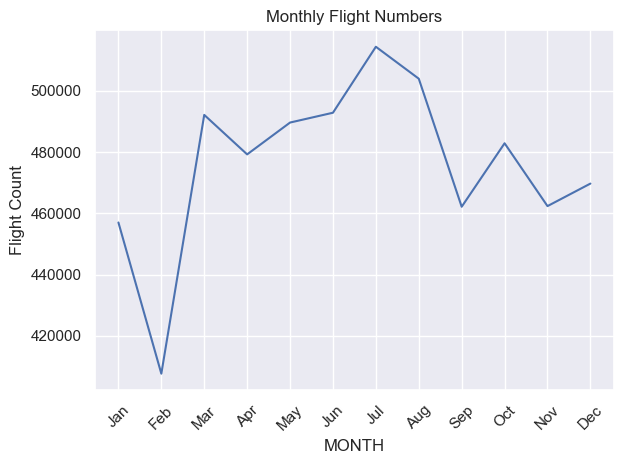

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Use seaborn style

labels = ['Jan', 'Feb','Mar','Apr', 'May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flight_path.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xticks(ticks=np.arange(1,13,1), labels=labels, rotation=45)
plt.ylabel("Flight Count")
plt.title("Monthly Flight Numbers")
plt.grid(True)
plt.tight_layout()
plt.show()



In [39]:
1

1

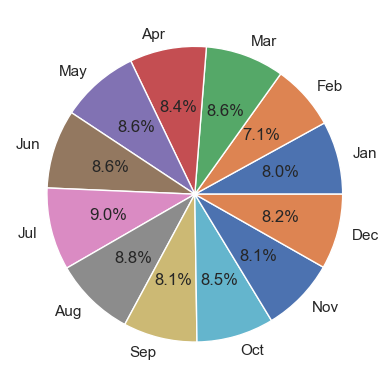

In [44]:
plt.pie(x=flight_path.groupby('MONTH').count()['FLIGHT_NUMBER'], autopct ='%1.1f%%', labels = labels)
plt.show()

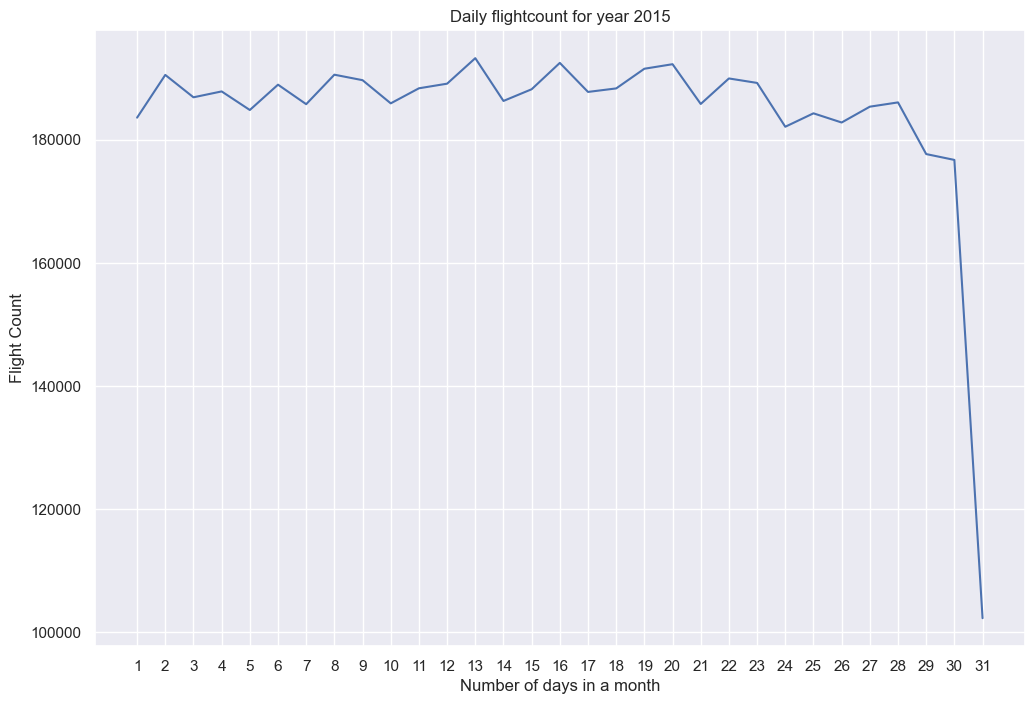

In [47]:
flight_path.groupby('DAY').count()['AIRLINE'].plot(figsize = (12,8))
plt.xlabel("Number of days in a month")
plt.xticks(np.arange(1,32,1))
plt.ylabel('Flight Count')
plt.title("Daily flightcount for year 2015")
plt.show()

In [49]:
flight_path.groupby('DAY_OF_WEEK').count()["AIRLINE"]

DAY_OF_WEEK
1    841794
2    827399
3    843242
4    857886
5    851387
6    689745
7    802555
Name: AIRLINE, dtype: int64

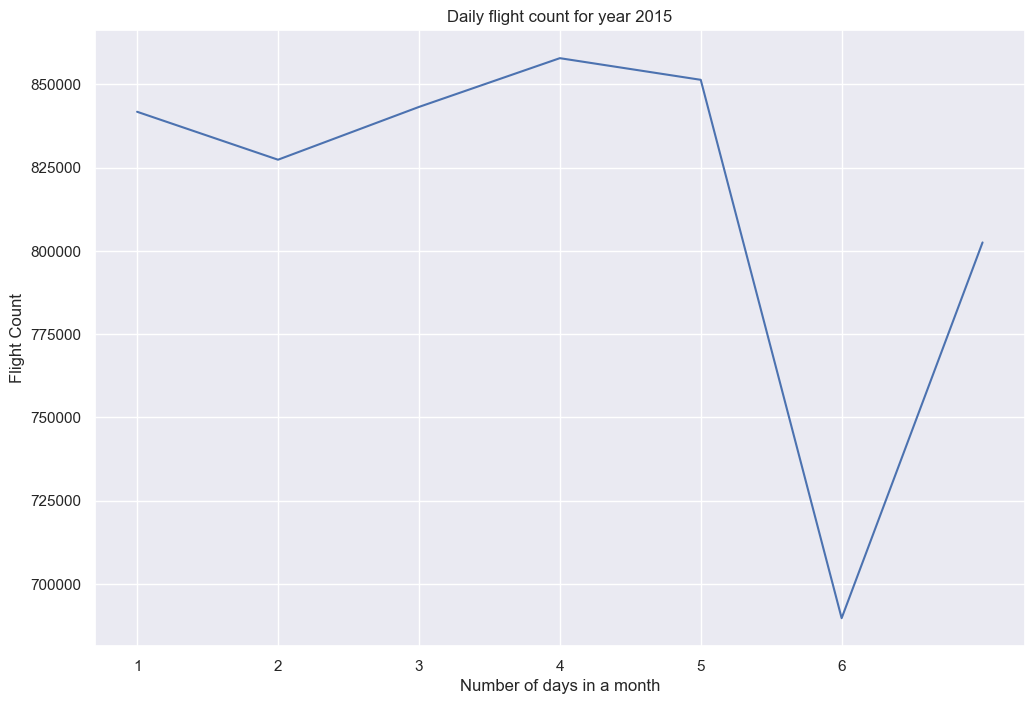

In [51]:
flight_path.groupby('DAY_OF_WEEK').count()['AIRLINE'].plot(figsize=(12,8))
plt.xlabel("Number of days in a month")
plt.xticks(np.arange(1,7,1))
plt.ylabel('Flight Count')
plt.title("Daily flight count for year 2015")
plt.show()

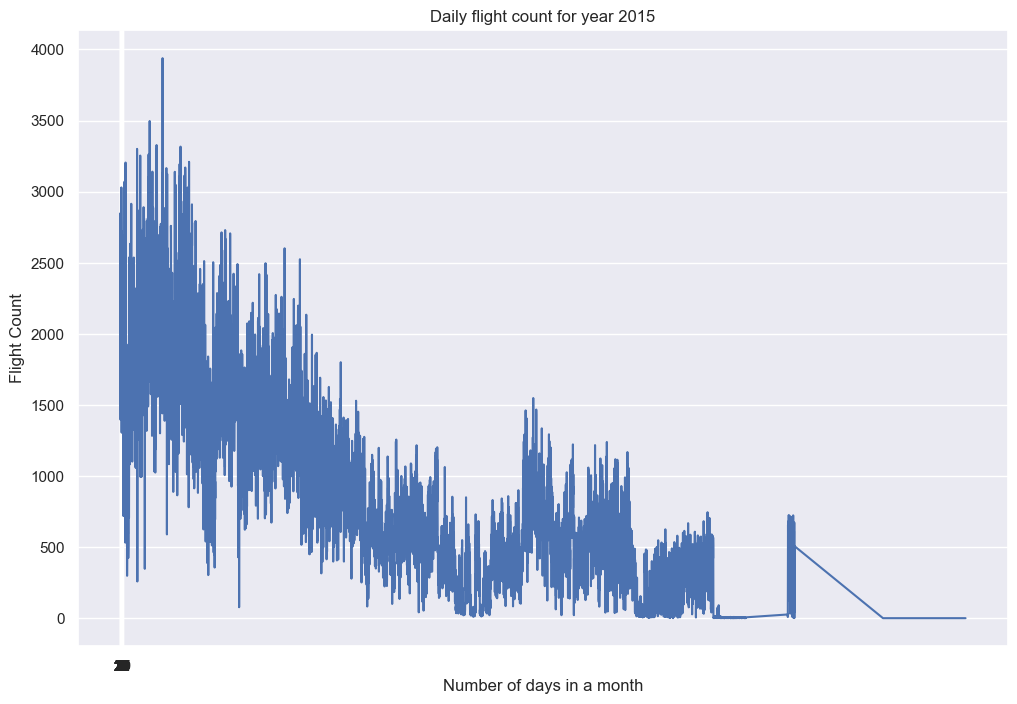

In [54]:
flight_path.groupby('FLIGHT_NUMBER').count()["AIRLINE"].plot(figsize=(12,8))
plt.xlabel("Number of days in a month")
plt.xticks(np.arange(1,30,1))
plt.ylabel('Flight Count')
plt.title("Daily flight count for year 2015")
plt.show()

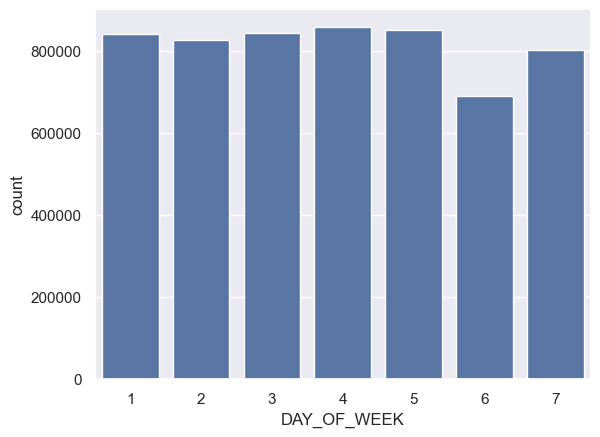

In [56]:
sns.countplot(data = flight_path, x='DAY_OF_WEEK')
plt.show()